In [120]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
import cv2 as cv

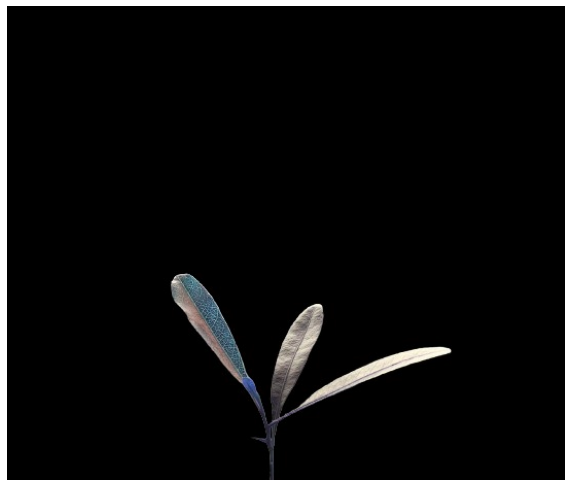

In [125]:
img = cv2.imread("images/test29-removebg-preview.jpg")
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img)
plt.show()

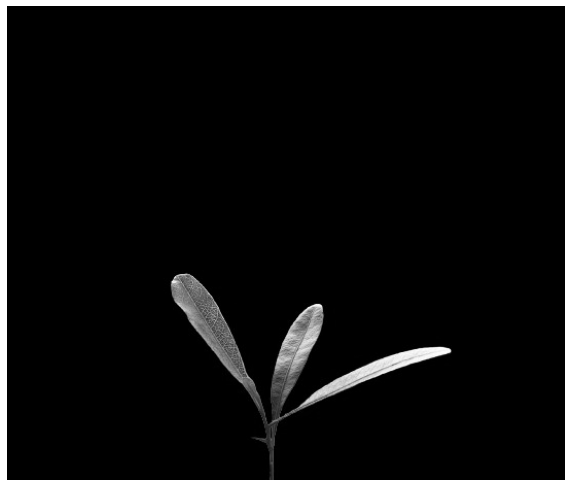

In [126]:
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
#cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.
cells = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(cells,cmap="gray")
plt.show()

In [127]:
cells = cv2.GaussianBlur(cells, (7, 7), 0)

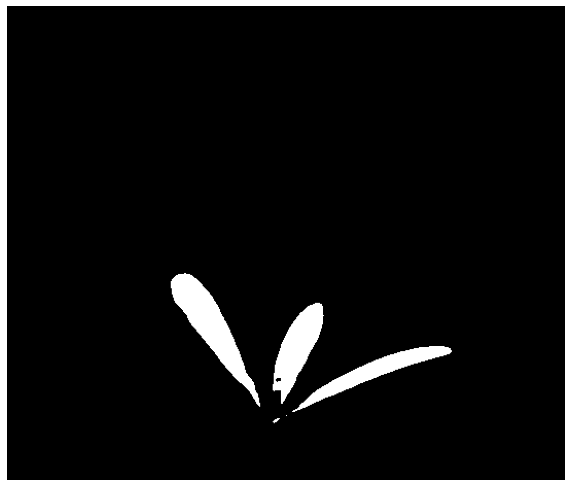

In [128]:
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(thresh,cmap="gray")
plt.show()

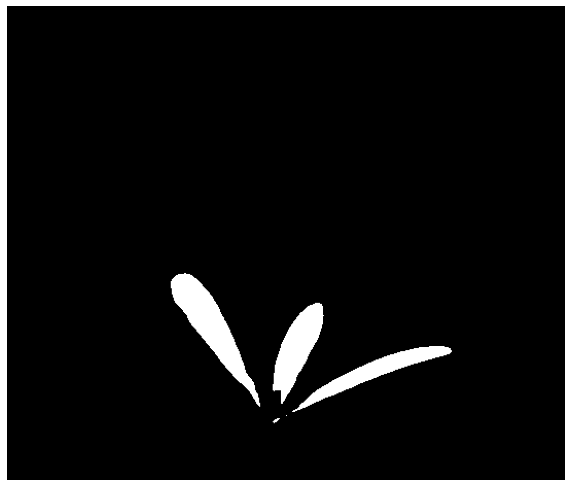

In [129]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(opening,cmap="gray")
plt.show()

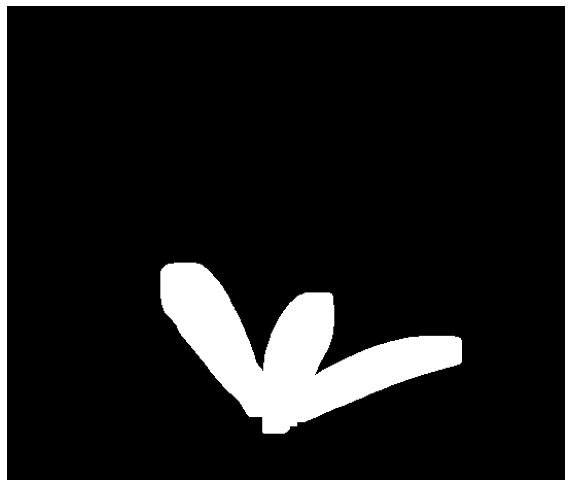

In [143]:
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(thresh,kernel,iterations=10)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sure_bg,cmap="gray")
plt.show()

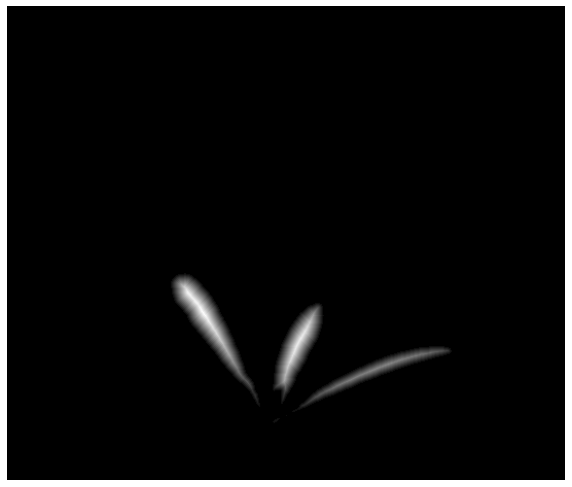

In [144]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(dist_transform,cmap="gray")
plt.show()

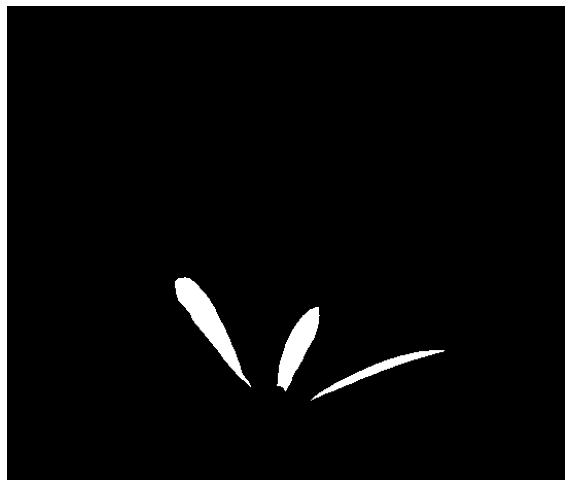

In [154]:
#ret, thresh = cv2.threshold(np.array(image, dtype=np.uint8), 0, 255, 0)
ret2, sure_fg = cv2.threshold(np.array(dist_transform,dtype = np.uint8),0.2*dist_transform.max(),255,0)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sure_fg,cmap="gray")
plt.show()

In [155]:
contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

3

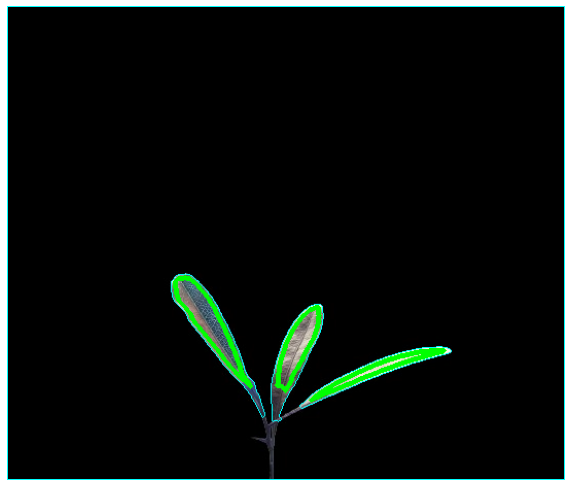

In [156]:
img_cp = img.copy()
cv.drawContours(img_cp, contours, -1, (0,255,0), 3)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img_cp,cmap="gray")
plt.show()

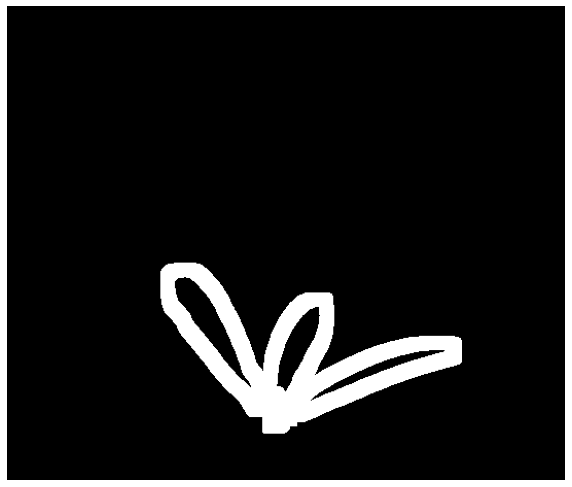

In [157]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(unknown,cmap="gray")
plt.show()

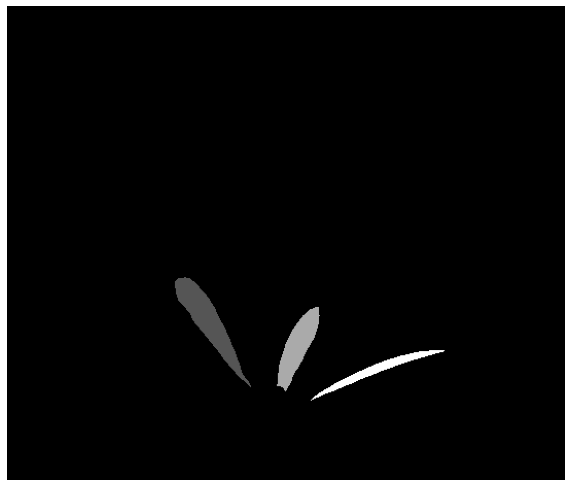

In [158]:
ret3, markers = cv2.connectedComponents(sure_fg)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(markers,cmap="gray")
plt.show()

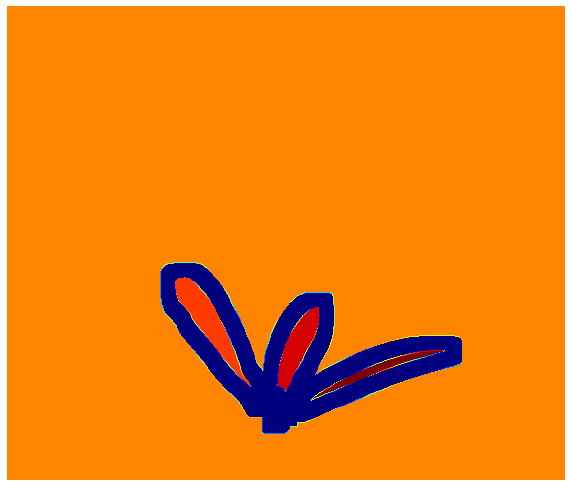

In [159]:
markers = markers+10

markers[unknown==255] = 0
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(markers, cmap='jet')   
plt.show()

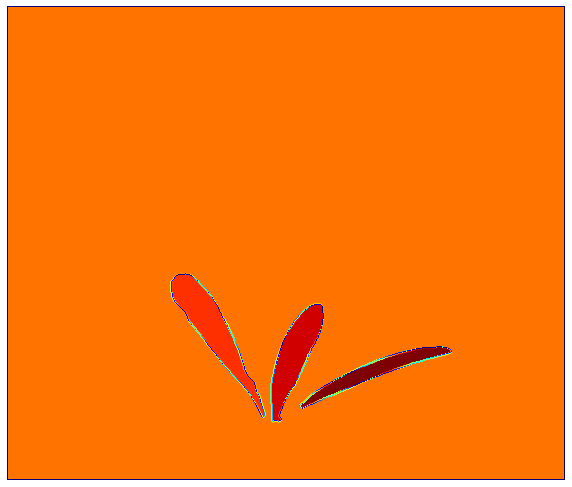

In [165]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,255,255]  
img2 = color.label2rgb(markers, bg_label=0)

plt.figure(figsize=(10,10))
#plt.subplot(121)
plt.axis("off")
plt.imshow(markers, cmap='jet')
"""
plt.subplot(122)
plt.axis("off")
plt.imshow(cells, cmap='gray')
"""
plt.show()

In [161]:
regions = measure.regionprops(markers,cells)

In [162]:
#Can print various parameters for all objects
for prop in regions:
    print('Label: {} Area: {} perimeter : {}'.format(prop.label, prop.area,prop.perimeter))

Label: 10 Area: 239377 perimeter : 2998.371716450253
Label: 11 Area: 3019 perimeter : 356.3452377915607
Label: 12 Area: 2435 perimeter : 276.2436867076458
Label: 13 Area: 1657 perimeter : 339.22034611053283


In [163]:
regionsTable = measure.regionprops_table(markers,img,properties=["label","area","perimeter","orientation"])

In [164]:
area = regionsTable["area"]
area

array([239377,   3019,   2435,   1657])

In [84]:
import pandas as pd
df = pd.DataFrame(regionsTable)



df['surface de feuille'] = df['area']
df['perimeter'] = df['perimeter'] 
print(df.head())

df.to_csv('fichierCsv/caracteristiquePlant2.csv')

   label    area    perimeter  orientation  surface de feuille
0     10  239378  2999.200144    -1.568502              239378
1     11    3018   357.173665     0.570996                3018
2     12    2435   276.243687    -0.390413                2435
3     13    1657   339.220346    -1.203089                1657
